In [ ]:
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
from PIL import ImageFilter
import random
import matplotlib.pyplot as plt


In [ ]:
class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=[.1, 2.]):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x

In [ ]:
augmentation = [
    transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
    transforms.RandomApply([
        transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)  # not strengthened
    ], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomApply([GaussianBlur([.1, 2.])], p=0.5),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
]

(1800, 1800, 3)
(300, 300, 3)


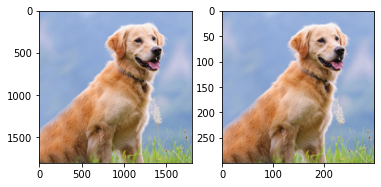

In [ ]:
img = Image.open('dog.png')
array = np.asarray(img)
print(array.shape)

img2 = img.resize((300,300))
array2 = np.asarray(img2)
print(array2.shape)

plt.subplot(1,2,1)
plt.imshow(array)

plt.subplot(1,2,2)
plt.imshow(array2)


In [ ]:
img3 = img.resize((224,224))
#plt.imshow(img3)
#plt.axis('off')
#plt.figure()
img3.save('simclr_dataaug_raw.png')

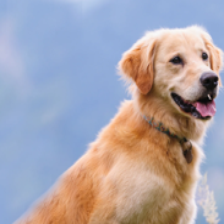

In [ ]:
transforms.RandomResizedCrop(224, scale=(0.2, 1.))(img3)

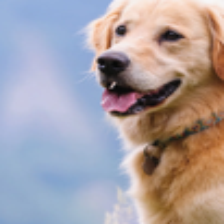

In [ ]:
augmentation = transforms.Compose([transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
                  transforms.RandomHorizontalFlip(),
                  ])
augmentation(img3)

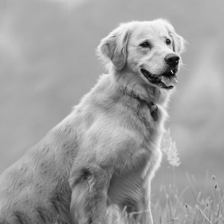

In [ ]:
transforms.RandomGrayscale(p=1)(img3)

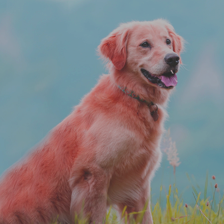

In [ ]:
transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)(img3)

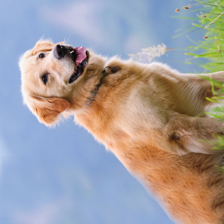

In [ ]:
transforms.functional.rotate(img3,90)

In [ ]:
# cut out

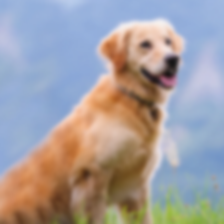

In [ ]:
transforms.RandomApply([GaussianBlur([.1, 2.])], p=1)(img3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

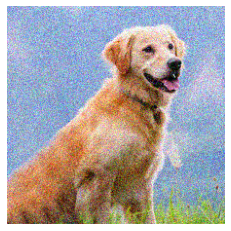

In [ ]:
array3 = np.asarray(img3)
array3 = (array3-array3.min()) / (array3.max()-array3.min())
gaussian = np.random.normal(0, 0.1, (array3.shape[0],array3.shape[1],array3.shape[2]))
noisy_image = array3 + gaussian 
plt.imshow(noisy_image)
plt.axis('off')
#cv2.imwrite('simclr_dataaug_noise.png',noisy_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

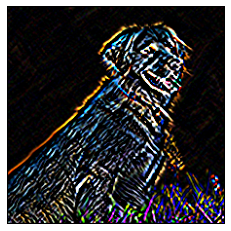

In [ ]:
import cv2
array4 = np.asarray(img3)
array4 = (array4-array4.min()) / (array4.max()-array4.min())
plt.imshow(cv2.Sobel(array4,cv2.CV_64F,1,1,ksize=5))
plt.axis('off')